In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from calculations import fret_calculations, processing_cleanup
import matplotlib as mpl
from IPython.display import display
import scipy.stats as stats
from calculations.significance import set_pvalue
import matplotlib.patches as mpatches

In [2]:
raw_data_path = r'D:/OneDrive/Virus/Paper1/Raw_data_csvs/Other/'
df = pd.read_csv(raw_data_path + 'heatshock_42-45.csv')
df = df.iloc[:, 1:]
display(df)

C:\Users\patri\AppData\Local\Temp\ipykernel_33316\364987909.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_data_path + 'heatshock_42-45.csv')


,label,area,donor_intensity_mean,donor_intensity_min,donor_intensity_max,donor_intensity_std,acceptor_intensity_mean,acceptor_intensity_min,acceptor_intensity_max,acceptor_intensity_std,...,experiment,experimentcondition,experimentparameter,replicate,passages,exposurecam1,exposurecam2,cyanled,blueled,greenled
0,1,16145.0,3233.475830,528.0,8880.0,1937.807129,4019.669189,331.188416,11073.675781,2503.466064,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
1,2,16932.0,2478.803955,564.0,5508.0,1171.928955,3201.475098,386.283203,6996.691406,1523.470581,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
2,3,17239.0,3135.282471,479.0,8428.0,1746.276733,3913.017578,386.175659,10727.284180,2324.516846,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
3,4,17527.0,3101.083496,777.0,6954.0,1312.081421,4041.770996,930.837341,8734.411133,1624.779541,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
4,5,29934.0,4476.021484,460.0,11586.0,2356.858154,5887.382812,374.739044,15040.096680,3174.642090,...,Heatshock,Heatshock,42,1,16,25,25,12U5,12U5,6U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300858,39,20414.0,3333.315674,496.0,8157.0,1604.447510,3657.069824,612.354614,8623.616211,1671.416504,...,Heatshock,Heatshock,42,1,19,25,25,12U5,12U5,6U5
300859,40,8235.0,4733.457520,969.0,9631.0,2116.646973,5049.796387,642.800476,9930.358398,2171.942627,...,Heatshock,Heatshock,42,1,19,25,25,12U5,12U5,6U5
300860,41,19530.0,4850.529785,775.0,12131.0,2516.383057,5162.752930,548.554688,12780.659180,2737.683350,...,Heatshock,Heatshock,42,1,19,25,25,12U5,12U5,6U5
300861,42,22285.0,2927.678711,436.0,9389.0,1778.371826,3261.896973,572.389465,9424.268555,1818.791626,...,Heatshock,Heatshock,42,1,19,25,25,12U5,12U5,6U5


In [3]:
comb_df = df

tmp_df = processing_cleanup.pixels_to_micron(comb_df)
tmp_df = fret_calculations.acceptor_correction(tmp_df)
tmp_df = fret_calculations.calculate_efret(tmp_df)
tmp_df = processing_cleanup.area_cutoffs(tmp_df)
tmp_df = processing_cleanup.remove_maximums(tmp_df, 'directAcceptor')
tmp_df = processing_cleanup.remove_minimums(tmp_df, 'directAcceptor')
tmp_df = processing_cleanup.directacceptor_mean_cutoffs(tmp_df)
tmp_df = processing_cleanup.donor_mean_cutoffs(tmp_df)
print(len(tmp_df))

133657


D:\anaconda3\envs\pyimagej\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='construct', ylabel='Efret'>

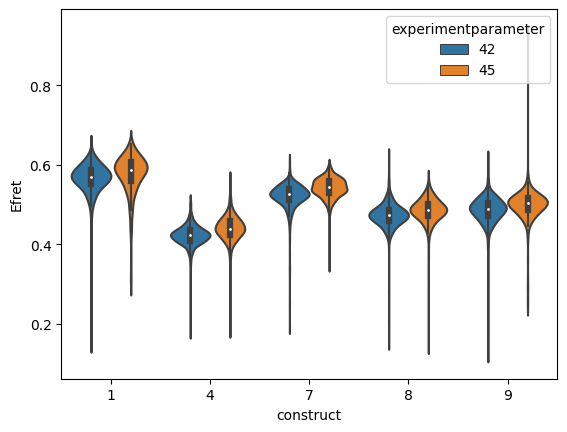

In [4]:
recom_df = tmp_df
recom_df['experimentparameter'] = recom_df['experimentparameter'].astype(str)
recom_df = recom_df.loc[(recom_df['construct']=='1') | (recom_df['construct']=='4') | (recom_df['construct']=='7') | (recom_df['construct']=='8') | (recom_df['construct']=='9')]

constructs = ['1',  '4', '7', '8', '9']
experiment_condition = ['Heatshock']
experiment_parameter = ['42', '45']

my_sort_dict = {
            'construct' : constructs,
            'experimentcondition': experiment_condition,
            'experimentparameter': experiment_parameter, 
               }

GS32 = recom_df.loc[(recom_df['construct']== 'GS32')]
recom_df = recom_df.loc[(recom_df['construct']!= 'GS32') & (recom_df['construct']!= 'SED1') &(recom_df['construct']!= 'mTQ2')&(recom_df['construct']!= 'mNG')]
recom_df = processing_cleanup.sort_values(recom_df, my_sort_dict)
recom_df = recom_df.reset_index(drop=True)
if 'Unnamed: 0.1' in recom_df.columns:
    recom_df = recom_df.drop(columns=['Unnamed: 0.1'])

sns_df = recom_df.loc[recom_df['timepoint']== 1]
sns.violinplot(sns_df, x= 'construct', y='Efret', hue='experimentparameter')


In [5]:
print(len(recom_df))
groupby_values = ['construct', 'experiment', 'experimentcondition', 'experimentparameter',  'timepoint']
filtered_df = processing_cleanup.remove_outliers(recom_df, groupby_values, 'Efret')
print(len(filtered_df))

43895
43236


In [6]:
groupby_values_per_repeat = ['construct', 'date', 'experiment', 'experimentcondition', 'timepoint', 'well', 'experimentparameter']
groupby_values_per_experiment = ['construct', 'experiment', 'experimentcondition',  'timepoint', 'experimentparameter']

total_stats_df = processing_cleanup.get_stats(filtered_df, groupby_values_per_repeat)
experiment_stats = processing_cleanup.get_stats(filtered_df, groupby_values_per_experiment)
#display(total_stats_df)
test = total_stats_df['Efret_list'].apply(np.array) - total_stats_df['Efret_median']

groupby_values_experiment = ['construct', 'experiment', 'experimentcondition', 'experimentparameter', 'timepoint']
holder_df = processing_cleanup.get_population_significance(total_stats_df, groupby_values_experiment, comparison_value = 0, comparison_column='timepoint')
ttest_df = holder_df.dropna()

new_values =  ['construct', 'experiment', 'experimentcondition', 'timepoint', 'experimentparameter']

population_count_df = processing_cleanup.get_stats(total_stats_df, new_values, ['count'], stat_column='Efret_median')
median_std_df = processing_cleanup.get_stats(total_stats_df, new_values, ['std'], stat_column='Efret_median')
list_efret_df = processing_cleanup.get_stats(total_stats_df, new_values, ['list'], stat_column='Efret_median')
population_count_df = population_count_df.drop(columns=new_values)
median_std_df = median_std_df.drop(columns = new_values)
list_efret_df = list_efret_df.drop(columns = new_values)
population_count_df = population_count_df.rename(columns={'Efret_median_count': 'well_count_per_timepoint'})
median_std_df = median_std_df.rename(columns={'Efret_median_std': 'std_median_per_timepoint'})
list_efret_df = list_efret_df.rename(columns={'Efret_median_std': 'list_median_per_timepoint'})

merged_data = pd.concat([experiment_stats, population_count_df, median_std_df, list_efret_df], axis=1)
#merged_data.to_csv(r'E:\Patrick\Test_data.csv')
display(merged_data, ttest_df)
merged_data = merged_data.merge(ttest_df, on=['construct', 'experiment', 'experimentcondition',  'timepoint','experimentparameter'])

merged_delta = merged_data.copy()

merged_delta = processing_cleanup.delta_time(merged_delta, 'Efret_median', group_values = ['construct', 'experiment', 'experimentparameter'], comparison=2)
merged_delta = processing_cleanup.remove_controls(merged_delta)
merged_delta = processing_cleanup.drop_counts(merged_delta, 40)

merged_delta = processing_cleanup.delta_time(merged_delta, 'Efret_median_list', group_values = ['construct', 'experiment', 'experimentparameter'], comparison=2)

total_df = total_stats_df.copy()

total_df = processing_cleanup.delta_time(total_df, 'Efret_median', group_values = ['construct', 'experiment','experimentparameter'], comparison=2)
total_df = processing_cleanup.remove_controls(total_df)


total_df = processing_cleanup.delta_list_median(total_df, merged_delta, 'Efret_list', group_values = ['construct', 'experiment','experimentparameter'], comparison=2)

consolidated_values = total_df.groupby(['construct', 'experiment', 'experimentparameter', 'timepoint'], observed=False, as_index=False)['delta_Efret_median'].apply(np.array)
consolidated_values = consolidated_values.loc[(consolidated_values['construct']!= 'mTQ2') & (consolidated_values['construct']!= 'mNG')]
consolidated_values = consolidated_values.dropna().reset_index(drop=True).rename(columns={'delta_Efret_median': 'delta_median_wells'})

merged_delta = merged_delta.merge(consolidated_values, on=['construct', 'experiment', 'experimentparameter', 'timepoint'], how='left')

consolidated_values = total_df.groupby(['construct', 'experiment', 'experimentparameter', 'timepoint'], observed=False, as_index=False)['delta_Efret_list'].apply(np.array)
consolidated_values = consolidated_values.loc[(consolidated_values['construct']!= 'mTQ2') & (consolidated_values['construct']!= 'mNG')]
consolidated_values = consolidated_values.dropna().reset_index(drop=True).rename(columns={'delta_Efret_median': 'delta_Efret_population'})

merged_delta = merged_delta.merge(consolidated_values, on=['construct', 'experiment', 'experimentparameter', 'timepoint'], how='left')

tmpr_df = merged_delta.copy()

construct_order = {c: i + 1 for i, c in enumerate(constructs)}


tmpr_df['base_position'] = tmpr_df['construct'].map(construct_order)

# Step 2: For each unique (construct, experimentparameter) pair, compute a subposition offset.
# This mapping is computed once, so it is consistent across all timepoints.
mapping = {}
for construct, order in construct_order.items():
    
    # Get unique experimentparameters for this construct, preserving order of appearance
    unique_params = pd.unique(tmpr_df.loc[tmpr_df['construct'] == construct, 'experimentparameter'])
    n = len(unique_params)
    # Compute offsets evenly in [-0.5, 0.5] (you can adjust the range as needed)
    offsets = (np.arange(n) - (n-1) / 2) / 4
    for exp, offset in zip(unique_params, offsets):
        mapping[(construct, exp)] = offset

# Step 3: Apply the mapping to assign a subposition to every row.
tmpr_df['subposition_offset'] = tmpr_df.apply(lambda row: mapping[(row['construct'], row['experimentparameter'])], axis=1)

tmpr_df['base_position'] = tmpr_df['base_position'].astype(int)
# Step 4: The final plot position for a row is the sum of its base position and subposition offset.
tmpr_df['plot_position'] = tmpr_df['base_position'] + tmpr_df['subposition_offset']
tmpr_df = tmpr_df.loc[(tmpr_df['timepoint']!=0)]


constructs = ['1', '4', '7', '8', '9']
experiment_condition = ['Heatshock']
experiment_parameter = ['42', '45']

my_sort_dict = {
            'construct' : constructs,
            'experimentcondition': experiment_condition,
            'experimentparameter': experiment_parameter, 
               }


tmpr_df = processing_cleanup.sort_values(tmpr_df, my_sort_dict)

,construct,experiment,experimentcondition,timepoint,experimentparameter,Efret_mean,Efret_median,Efret_min,Efret_max,Efret_std,Efret_count,Efret_var,Efret_list,well_count_per_timepoint,std_median_per_timepoint,Efret_median_list
0,1,Heatshock,Heatshock,0,42,0.576538,0.579371,0.389872,0.648313,0.032545,496,0.001059,"[0.5912895036688013, 0.5653755204468282, 0.555...",8,0.015914,"[0.5658564641607278, 0.5518868769314897, 0.577..."
1,1,Heatshock,Heatshock,0,45,0.590371,0.598013,0.291059,0.676856,0.045113,179,0.002035,"[0.580061144663367, 0.5835385279095627, 0.6136...",8,0.010311,"[0.5835385279095627, 0.5955293110084069, 0.595..."
2,1,Heatshock,Heatshock,1,42,0.566391,0.572200,0.153509,0.648804,0.043812,496,0.001920,"[0.5511083208413889, 0.5887782400254676, 0.544...",8,0.012850,"[0.5588294789762343, 0.5559341011406651, 0.585..."
3,1,Heatshock,Heatshock,1,45,0.585422,0.590441,0.357218,0.651591,0.039589,193,0.001567,"[0.5803664616576641, 0.5722371968663248, 0.579...",8,0.012027,"[0.579783595906705, 0.5829797380648123, 0.6058..."
4,1,Heatshock,Heatshock,2,42,0.563550,0.568340,0.158795,0.651221,0.041463,492,0.001719,"[0.5204225753612832, 0.5172541970576457, 0.550...",8,0.011747,"[0.5605170038752254, 0.5535682275961474, 0.581..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,9,Heatshock,Heatshock,6,45,0.486149,0.490589,0.215051,0.590526,0.039826,369,0.001586,"[0.43537332654619115, 0.49284364401425823, 0.4...",8,0.003262,"[0.49044526177002906, 0.49547042348089865, 0.4..."
86,9,Heatshock,Heatshock,7,42,0.476123,0.477086,0.191302,0.589907,0.032059,410,0.001028,"[0.4554211969890433, 0.4421716898287559, 0.449...",9,0.014563,"[0.46563726697082425, 0.4606254008342162, 0.45..."
87,9,Heatshock,Heatshock,7,45,0.484664,0.489312,0.247980,0.571483,0.036137,354,0.001306,"[0.47027856580608796, 0.47305445856690725, 0.4...",9,0.005600,"[0.49079050230004545, 0.49383087811542964, 0.4..."
88,9,Heatshock,Heatshock,8,42,0.476869,0.478497,0.193668,0.577364,0.030675,409,0.000941,"[0.45747892502961784, 0.4660699423517501, 0.45...",9,0.012872,"[0.46548375950597937, 0.46304223173572445, 0.4..."


,construct,experiment,experimentcondition,experimentparameter,timepoint,ttest,pvalue,star_value
0,1,Heatshock,Heatshock,42,0,NaN,NaN,ns
1,1,Heatshock,Heatshock,42,1,0.723431,0.481329,ns
2,1,Heatshock,Heatshock,42,2,1.078833,0.298899,ns
3,1,Heatshock,Heatshock,42,3,1.631179,0.125136,ns
4,1,Heatshock,Heatshock,42,4,1.872675,0.080737,ns
...,...,...,...,...,...,...,...,...
85,9,Heatshock,Heatshock,45,4,4.941135,0.000178,***
86,9,Heatshock,Heatshock,45,5,4.620788,0.000333,***
87,9,Heatshock,Heatshock,45,6,4.077414,0.000991,***
88,9,Heatshock,Heatshock,45,7,4.781198,0.000204,***


C:\Users\patri\AppData\Local\Temp\ipykernel_33316\1667880685.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_parameter['timepoint'] = (current_parameter['timepoint'] * 0.5) -1


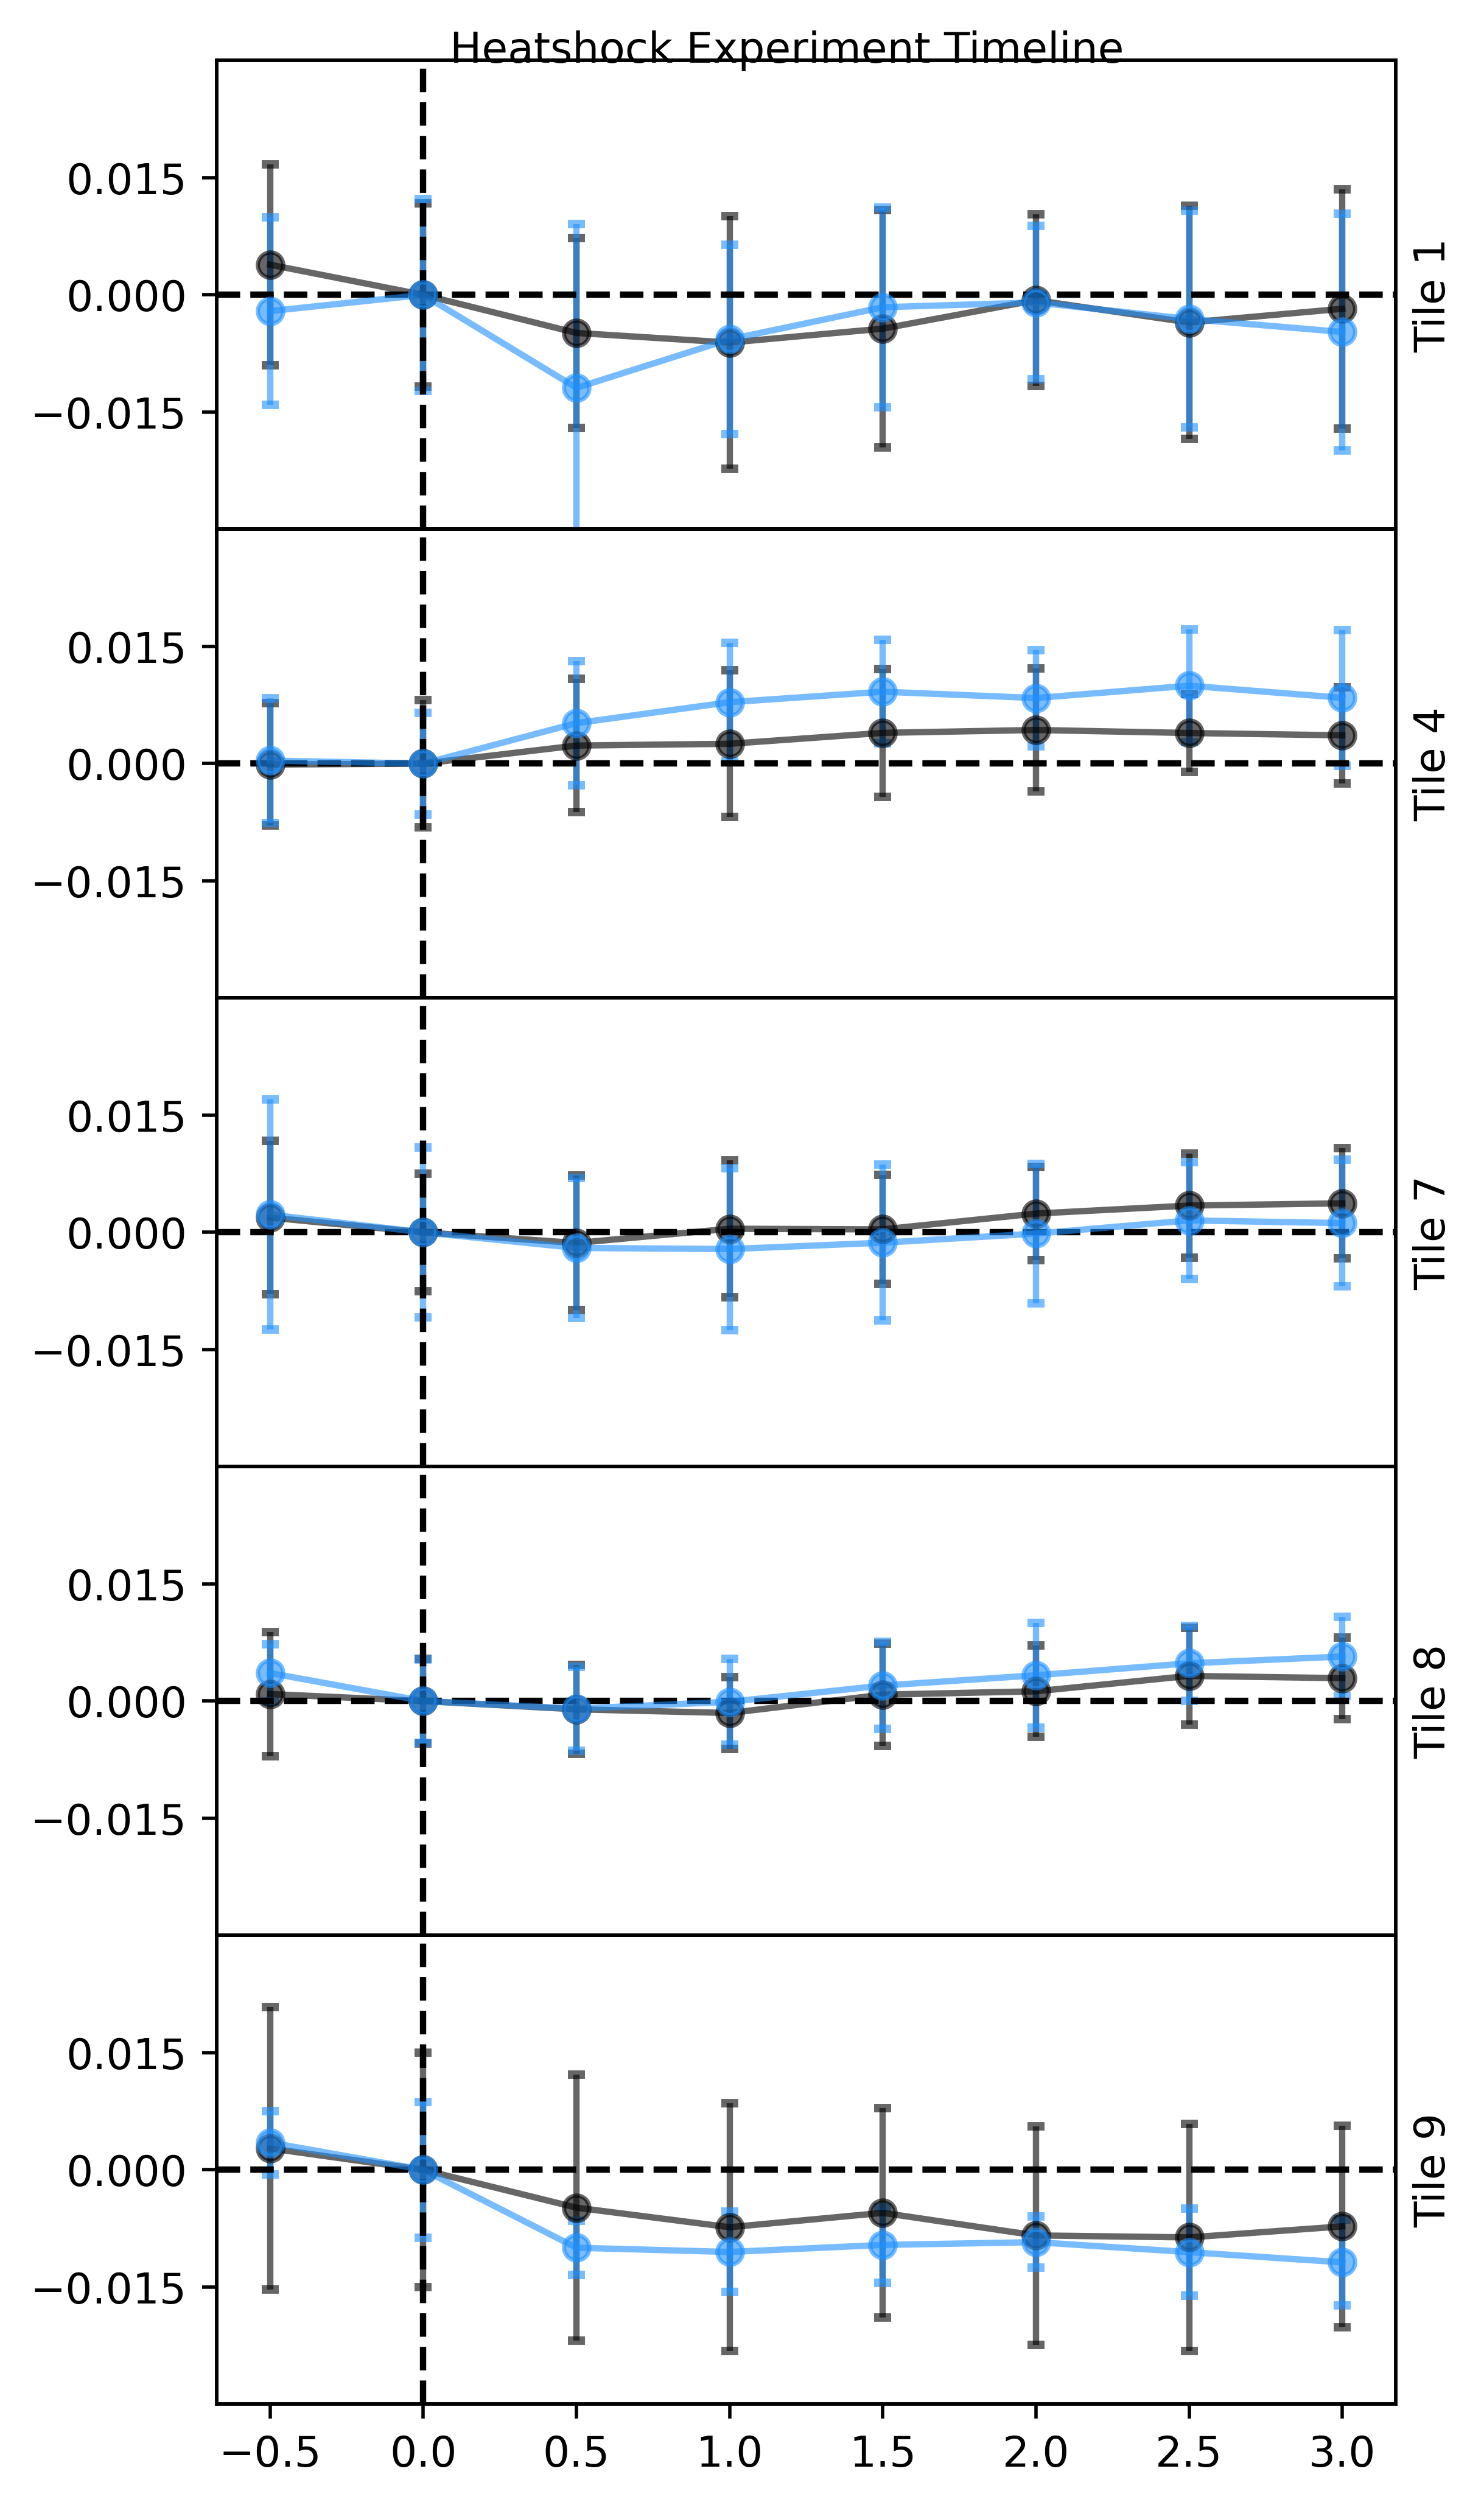

In [23]:
generator = tmpr_df.groupby('construct', observed=True)
mpl.rcParams['figure.dpi'] = 500
fig_len = 5
fig, ax =plt.subplots(fig_len,  1, figsize=(5,10)) 
for index, container in enumerate(generator):
    construct = container[0]
    
    if index < fig_len:
        container_df = container[1]
        
        
        indexer = 0
        colors = ['k', 'dodgerblue', 'firebrick']
        for parameter in container_df.experimentparameter.unique():
            
            current_parameter = container_df.loc[container_df['experimentparameter']== parameter]
            current_parameter['timepoint'] = (current_parameter['timepoint'] * 0.5) -1
            
            ax[index].scatter(x=current_parameter['timepoint'], y=current_parameter['delta_Efret_median'], alpha=0.6, c=colors[indexer], zorder=3)
            ax[index].errorbar(current_parameter['timepoint'], current_parameter['delta_Efret_median'], yerr = current_parameter['std_median_per_timepoint'], c=colors[indexer],
                                                    capsize=2, capthick=2, alpha=0.6)
            indexer += 1
        ax[index].set_ylim(-0.03, 0.03)
        ax[index].set_yticks([-0.015, 0, 0.015])
        ax[index].set_xticks([])
        ax[index].axvline(x=0.0, c='k', linestyle='--')
        ax[index].axhline(y=0.0, c='k', linestyle='--')
        ax2 = ax[index].twinx()
        ax2.set_yticks([])
        ax2.set_ylabel(ylabel = 'Tile ' + str(construct))

tick_array = np.array(current_parameter['timepoint'])
ax[-1].set_xticks(tick_array)
fig.suptitle('Heatshock Experiment Timeline', fontsize=10, x=0.5, y=0.89)
plt.subplots_adjust(hspace=0)
plt.savefig(r'D:\OneDrive\Virus\Paper1\Paper1_figures\heatshock_42-45_timeline_5contructs.svg', format='svg', bbox_inches='tight')

C:\Users\patri\AppData\Local\Temp\ipykernel_33316\2031394157.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_tmp['timepoint'] = new_tmp['timepoint'] * 0.5


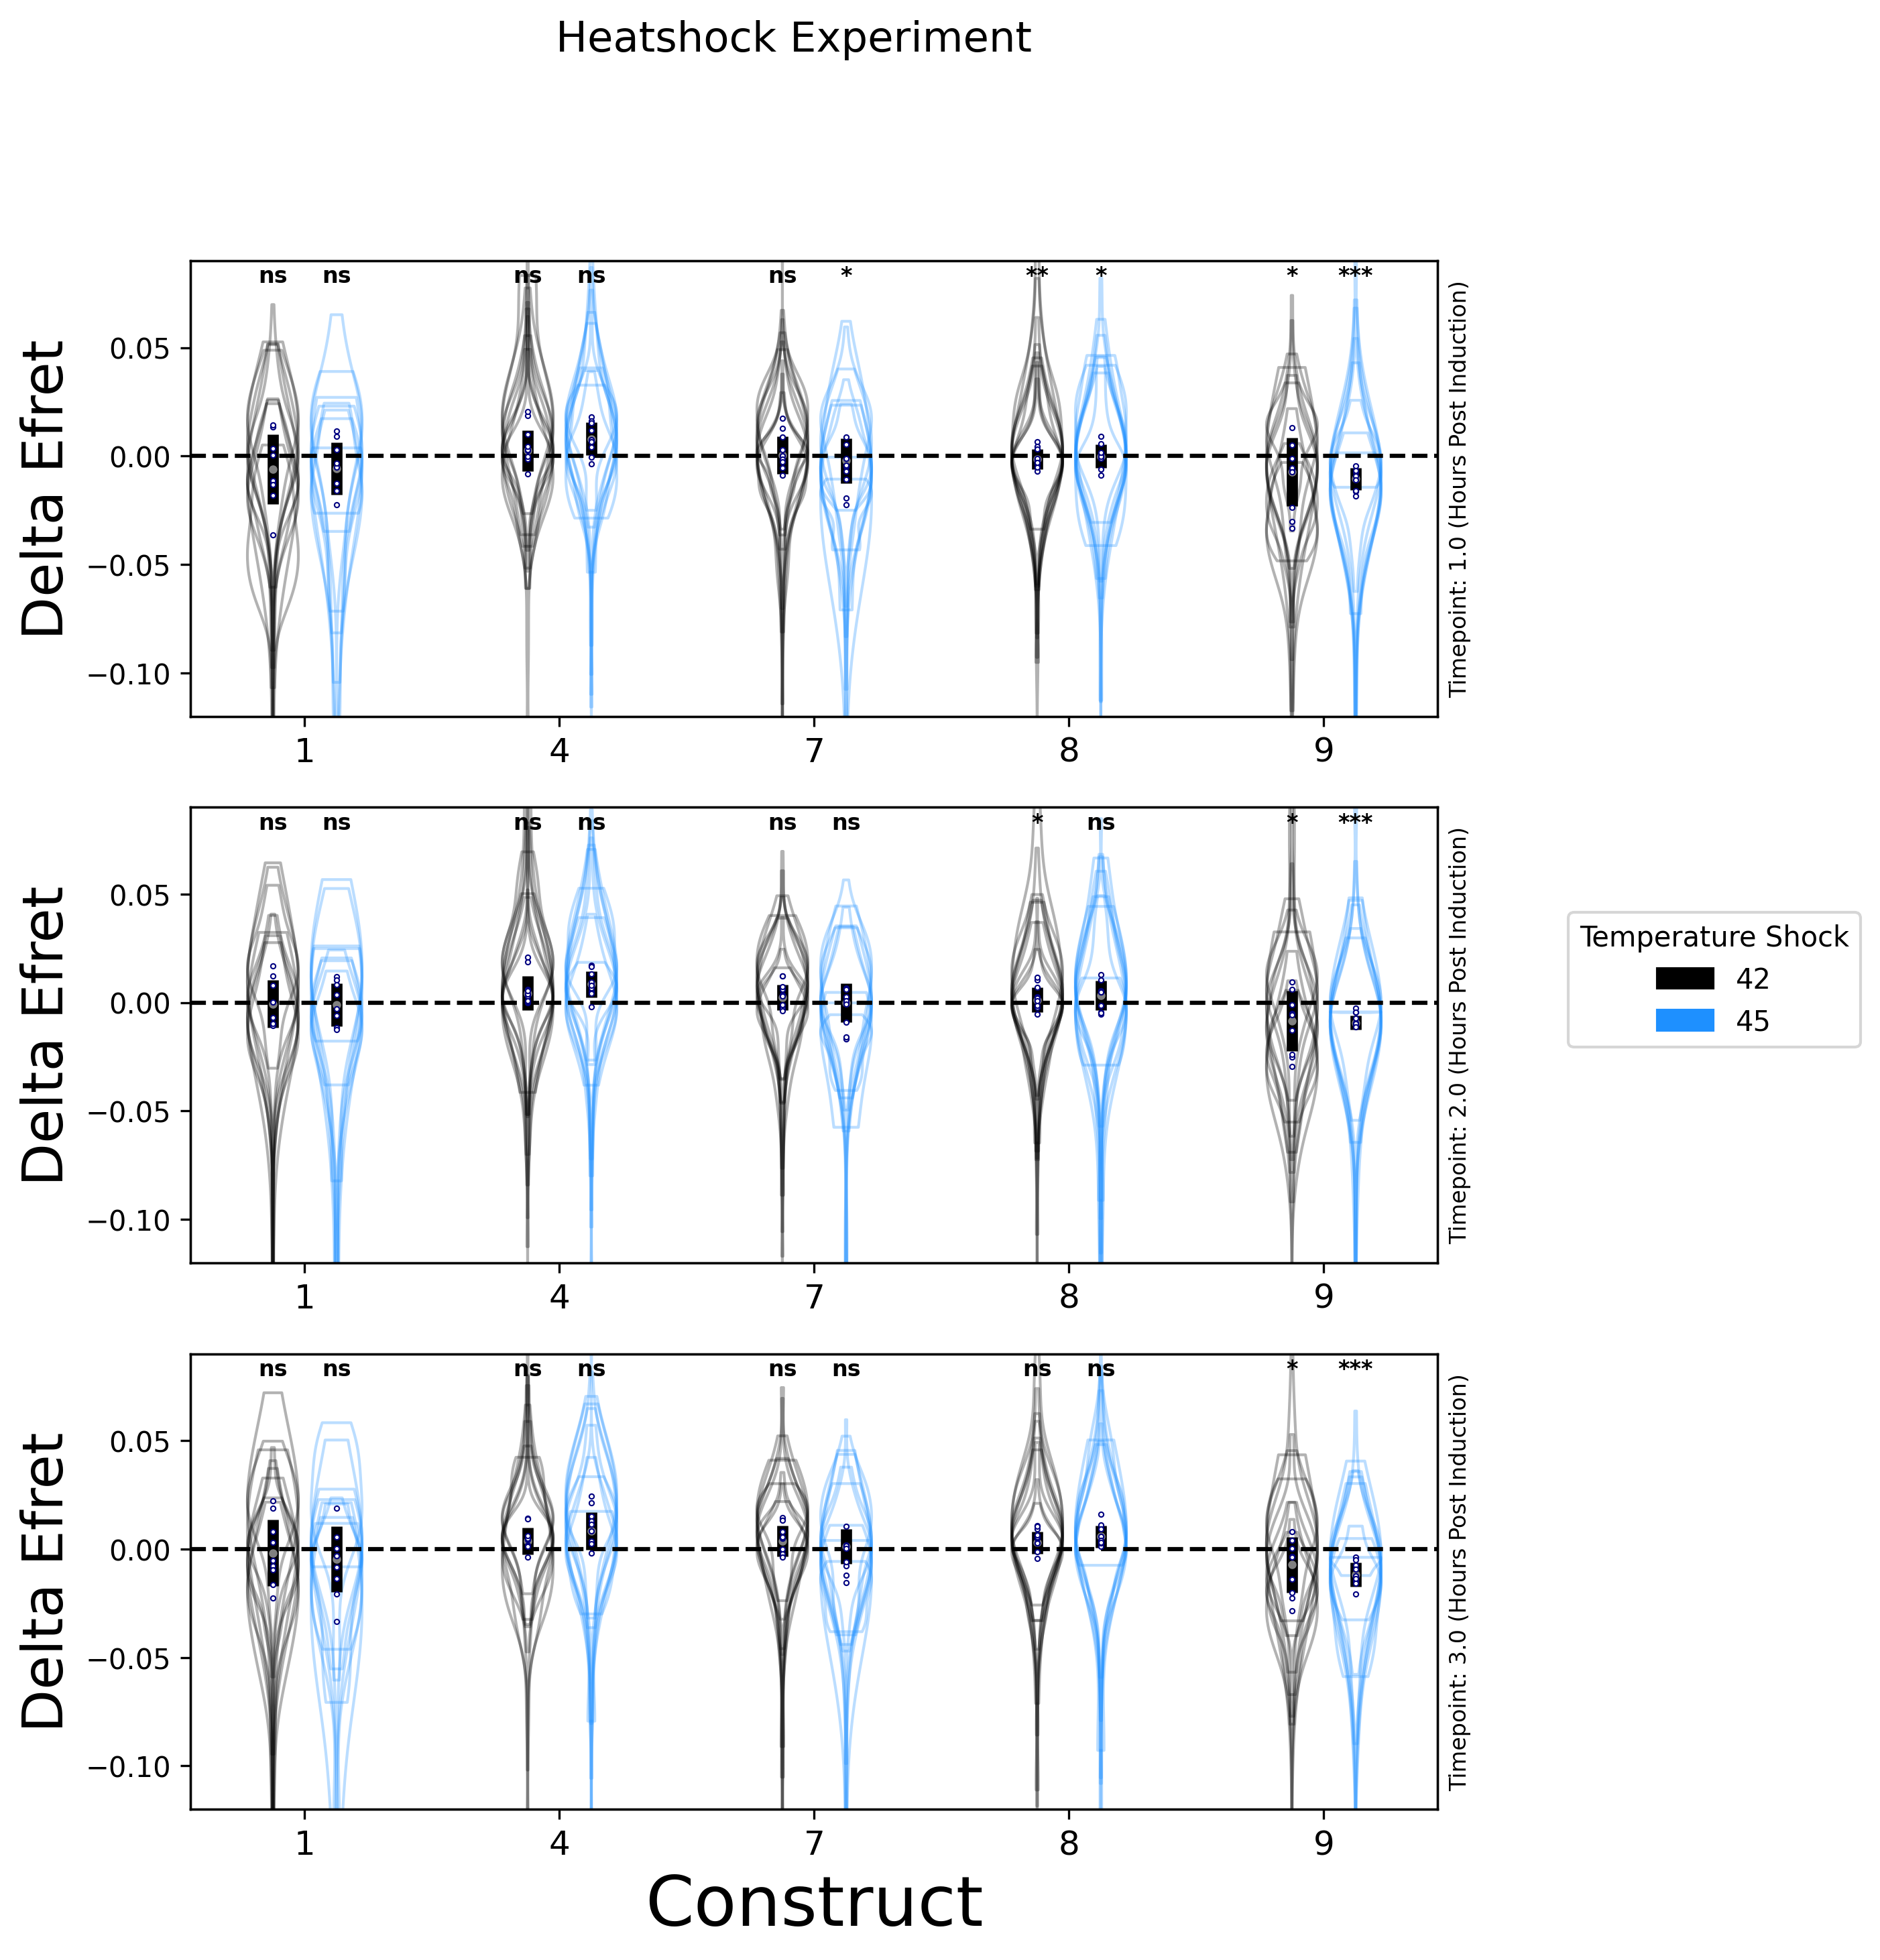

In [22]:
replaced_data = tmpr_df
violin_dataframe_path =r'D:/OneDrive/Virus/Paper1/processed_csvs/heatshock_42-45_violin_csv.csv'
save_csv = False
save_plot = True
if save_csv:
    replaced_data.to_csv(violin_dataframe_path)
reduced_df = replaced_data.loc[(replaced_data['timepoint']==4) | (replaced_data['timepoint']==6) | (replaced_data['timepoint']==8)]

mpl.rcParams['figure.dpi'] = 300
colors = ['k', 'dodgerblue', 'firebrick']

construct = len(reduced_df.construct.unique())
timepoints = len(reduced_df.timepoint.unique())
parameter = len(reduced_df.experimentparameter.unique())
grouped_values = ['timepoint']

uni_construct = reduced_df.construct.unique()
#indexer length
row_len = timepoints

fig, ax = plt.subplots(row_len, 1, figsize=(8, 10))

new_tmp = reduced_df
new_tmp['timepoint'] = new_tmp['timepoint'] * 0.5
median_violin_generator = new_tmp.groupby(grouped_values, observed=True, as_index=True)

for index, container in enumerate(median_violin_generator):
    tmp_df = container[1]
    row = index
    #plots Experiment median and std
    ax[row].scatter(x= tmp_df['plot_position'], y=tmp_df['delta_Efret_median'], s=4, c='gray', zorder=3)
    ax[row].errorbar(x= tmp_df['plot_position'], y=tmp_df['delta_Efret_median'], yerr= tmp_df['std_median_per_timepoint'], linestyle='none', color='k',elinewidth=4)
    
    #offset star y values
    y=0
    #rest starting put when a new construct is iterated
    con_holder = None
    #plot star values
    for x in tmp_df['plot_position']:
        len_param = tmp_df.experimentparameter.nunique()
        current_construct = tmp_df.loc[tmp_df['plot_position']==x, 'construct'].iloc[0]
        if con_holder is None:
            con_holder = current_construct
            y+=1
             
        if con_holder != current_construct:
            y=0
            con_holder = current_construct
            y+=1
            
        if y == len_param:
            y=0
            y+=1
            
        y_pos = 0.087 - y*0.007
        star_val = tmp_df.loc[tmp_df['plot_position']==x, 'star_value']
        ax[row].text(x, y_pos, s=star_val.iloc[0], fontsize=8, fontweight='bold', ha='center')
        y+=1
    ax[row].set_ylim([-0.12, 0.09])
    tmp_explode = tmp_df.explode('delta_Efret_median_list')
    ax[row].scatter(x=tmp_explode['plot_position'] , y=tmp_explode['delta_Efret_median_list'], s=3, c='white', edgecolor='navy', linewidth=0.5, zorder=3)

    tmp_explode = tmp_df.explode('delta_Efret_list')
    
    iterator = 0 
     
    
    
    for x in tmp_df['plot_position']:
        list_explode = tmp_explode.loc[tmp_explode['plot_position']== x]
        current_parameter = tmp_explode.loc[tmp_explode['plot_position']== x, 'experimentparameter'].iloc[0]
        
        len_dataframe = len(list_explode)
        
        len_para = tmp_explode.experimentparameter.nunique()
        if iterator == len_para:
            iterator = 0
        if 'Growth' == current_parameter:
            iterator = 0 
            
        current_color = colors[iterator]
        
        for sub in range(len_dataframe):
            current_dataframe = list_explode.iloc[sub]
            
            final_explode = current_dataframe['delta_Efret_list']
            violins =ax[row].violinplot(final_explode, [x], widths=0.2, showextrema=False, showmedians=False, showmeans=False)

            
            for pc in violins['bodies']:
                pc.set_facecolor('None')
                pc.set_edgecolor(current_color)
                pc.set_aplha=0.3

        iterator += 1

    ax[row].axhline(y=0, c='k', linestyle ='--')
    ax[row].set_xticks(np.arange(1, construct+1, 1))
    ax[row].set_xticklabels(uni_construct, fontsize='large')


    twinax = ax[row].twinx()
    twinax.set_ylabel('Timepoint: '+ str(container[0][0] - 1)+ ' (Hours Post Induction)', fontsize=8)
    twinax.set_yticks([])

    ax[row].set_ylabel('Delta Efret', fontsize=20)
ax[-1].set_xlabel('Construct', fontsize=25)

patch = []
labels = ['42', '45']
for color, label in zip(colors, labels):
    tmp_patch = mpatches.Patch(color=color, label=label)
    patch.append(tmp_patch)
plt.legend(title='Temperature Shock', handles=patch, loc='upper right', bbox_to_anchor=(1.35, 2))

fig.suptitle('Heatshock Experiment', fontsize=15, x=0.5, y=1)
if save_plot:
    plt.savefig(r'D:\OneDrive\Virus\Paper1\Paper1_figures\heatshock_42-45_violin_5contructs.svg', format='svg', bbox_inches='tight')
plt.show()
